In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("D:\\data science\\data sets\\New folder\\insurance kaggle.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratotary Data Analysis

In [6]:
df.duplicated().sum()

1

In [7]:
df=df.drop_duplicates()

In [8]:
df["age"].mean()

39.222139117427076

In [9]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [10]:
df["age"].min()

18

In [11]:
df["age"].max()

64

In [12]:
df["age"].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [13]:
import matplotlib.pyplot as plt

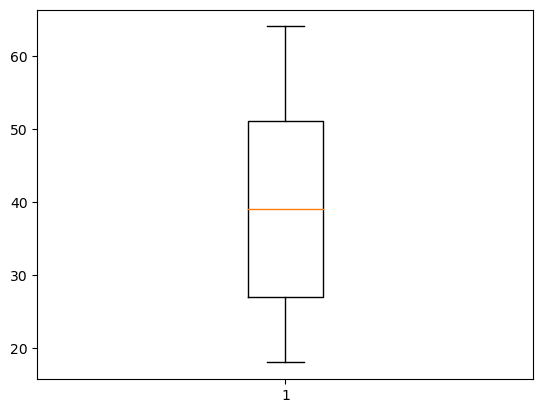

In [14]:
plt.boxplot(df["age"])
plt.show()

In [15]:
df["age"].value_counts()

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [16]:
df["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [17]:
df["bmi"].mean()

30.66345175766642

In [18]:
df["bmi"].info()

<class 'pandas.core.series.Series'>
Int64Index: 1337 entries, 0 to 1337
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
1337 non-null   float64
dtypes: float64(1)
memory usage: 20.9 KB


In [19]:
df["bmi"].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

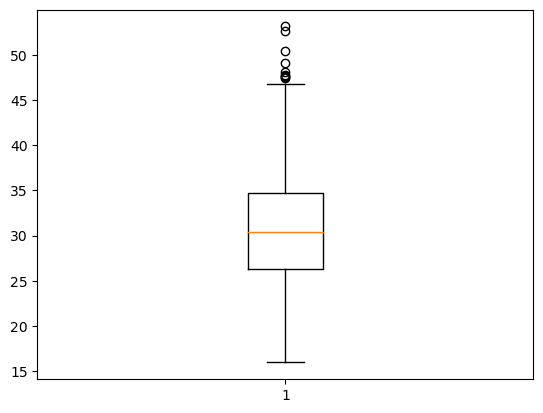

In [20]:
plt.boxplot(df["bmi"])
plt.show()

- bmi have outliers to treat.

In [21]:
df["children"].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [22]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [23]:
df["children"].isnull().sum()

0

In [24]:
pd.crosstab(df["sex"],df["smoker"])

smoker,no,yes
sex,,
female,547,115
male,516,159


In [25]:
df["smoker"].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

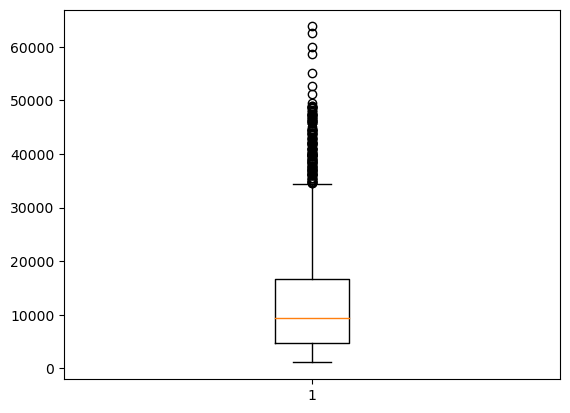

In [26]:
plt.boxplot(x=df["charges"])
plt.show()

In [27]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

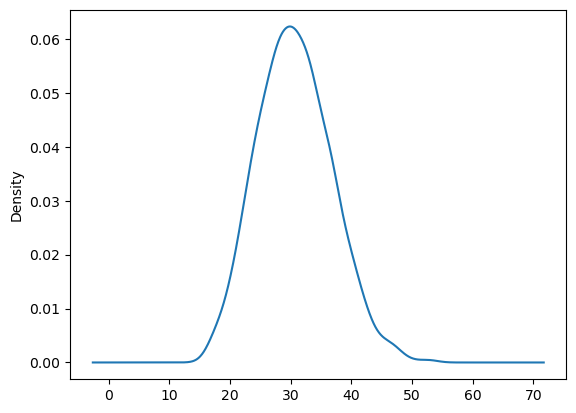

In [28]:
df["bmi"].plot(kind="kde")
plt.show()

In [29]:
df["bmi"].skew()

0.28391419385321137

In [30]:
df["age"].skew()

0.054780773126998195

In [31]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

#### encoding


In [32]:
df["sex"].replace({"female":0,"male":1},inplace=True)

In [33]:
df["smoker"].replace({"no":0,"yes":1},inplace=True)
df["region"].replace({"northeast":0,"northwest":1,"southeast":2,"southwest":3},inplace=True)

In [34]:
x=df.drop(["charges"],axis=1)
y=df["charges"]

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
x_train

,age,sex,bmi,children,smoker,region
896,43,0,20.045,2,1,0
194,18,1,34.430,0,0,2
240,23,0,36.670,2,1,0
1257,54,0,27.645,1,0,1
575,58,0,27.170,0,0,1
...,...,...,...,...,...,...
764,45,0,25.175,2,0,0
836,36,1,31.500,0,0,3
1217,29,1,37.290,2,0,2
559,19,1,35.530,0,0,1


In [37]:
x_test

,age,sex,bmi,children,smoker,region
1248,18,0,39.820,0,0,2
610,47,0,29.370,1,0,2
393,49,1,31.350,1,0,0
503,19,1,30.250,0,1,2
198,51,0,18.050,0,0,1
...,...,...,...,...,...,...
809,25,1,25.840,1,0,0
726,41,1,28.405,1,0,1
938,18,1,26.180,2,0,2
474,54,1,25.100,3,1,3


In [38]:
y_train

896     19798.05455
194      1137.46970
240     38511.62830
1257    11305.93455
575     12222.89830
           ...     
764      9095.06825
836      4402.23300
1217     4058.11610
559      1646.42970
685     11244.37690
Name: charges, Length: 1069, dtype: float64

In [39]:
y_test

1248     1633.96180
610      8547.69130
393      9290.13950
503     32548.34050
198      9644.25250
           ...     
809      3309.79260
726      6664.68595
938      2304.00220
474     25382.29700
1084    15019.76005
Name: charges, Length: 268, dtype: float64

#### LinearRegression


In [40]:
# MODELING
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)

#PREDICTION
ypred_train=linear.predict(x_train)
ypred_test=linear.predict(x_test)

#EVOLUTION
from sklearn.metrics import r2_score
print("train r2",linear.score(x_train,y_train))
print("test r2",linear.score(x_test,y_test))
from sklearn.model_selection import cross_val_score
print("cross_val_score",cross_val_score(linear,x,y,cv=5).mean())

train r2 0.7487799749798774
test r2 0.7526726290709553
cross_val_score 0.7471285330088384


#### lasso Regression

In [41]:
#modeling
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=6)
lasso.fit(x_train,y_train)

#prediction 
ypred_train=lasso.predict(x_train)
ypred_test=lasso.predict(x_test)

#evolution 
from sklearn.metrics import r2_score
print("train r2",lasso.score(x_train,y_train))
print("test r2",lasso.score(x_test,y_test))
from sklearn.model_selection import cross_val_score
print("cross_val_score",cross_val_score(lasso,x,y,cv=5).mean())

train r2 0.7487799741003858
test r2 0.7526727805604957
cross_val_score 0.7471293257862935


##### hyperparametertuning

In [42]:
from sklearn.model_selection import GridSearchCV
estimator=Lasso()
param_grid={"alpha":[0.1,0.15,0.25,0.5,0.75,0.85,1,10,50,100]}
grid=GridSearchCV(estimator,param_grid,scoring="neg_mean_squared_error")
grid.fit(x_train,y_train)
grid.best_params_

{'alpha': 0.1}

#### Ridge Regression

In [43]:
# modeling
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

# prediction
ypred_train=ridge.predict(x_train)
ypred_test=ridge.predict(x_test)

#evolution

from sklearn.metrics import r2_score
print("train r2 ",ridge.score(x_train,y_train))
print("test r2",ridge.score(x_test,y_test))
from sklearn.model_selection import cross_val_score 
print("cross_val-score",cross_val_score(ridge,x,y,cv=5).mean())


train r2  0.7487797566816379
test r2 0.7526636514357836
cross_val-score 0.7471293780579389


In [44]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV
estimator=Ridge()
param_grid={"alpha":[0.1,0.5,0.75,1,10,50,100]}
grid=GridSearchCV(estimator,param_grid,scoring="neg_mean_squared_error")
grid.fit(x_train,y_train)
grid.best_params_

{'alpha': 0.1}

#### Elastic Regression

In [45]:
#modeling
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=0.1,l1_ratio=1)
elastic.fit(x_train,y_train)

#prediction
ypred_train=elastic.predict(x_train)
ypred_train=elastic.predict(x_test)

#evolution
from sklearn.metrics import r2_score
print("train r2 ",elastic.score(x_train,y_train))
print("test r2",elastic.score(x_test,y_test))
from sklearn.model_selection import cross_val_score
print("cross_val_score",cross_val_score(elastic,x,y,cv=5).mean())


train r2  0.7487799741003858
test r2 0.7526727805604957
cross_val_score 0.7471293257862935


In [46]:
#hyperparametertuning
from sklearn.model_selection import GridSearchCV
estimator=ElasticNet()
param_grid={"alpha":[0.1,1,10,50,100],"l1_ratio":[0,0.15,0.3,0.45,0.6,0.75,0.9,1]}
grid=GridSearchCV(estimator,param_grid,scoring="neg_mean_squared_error")
grid.fit(x_train,y_train)
grid.best_params_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.083e+10, tolerance: 1.220e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.044e+10, tolerance: 1.263e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.765e+10, tolerance: 1.220e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.939e+10, tolerance: 1.263e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

{'alpha': 0.1, 'l1_ratio': 1}

## final model

In [47]:
# modeling
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

# prediction
ypred_train=ridge.predict(x_train)
ypred_test=ridge.predict(x_test)

#evolution

from sklearn.metrics import r2_score
print("train r2 ",ridge.score(x_train,y_train))
print("test r2",ridge.score(x_test,y_test))
from sklearn.model_selection import cross_val_score 
print("cross_val-score",cross_val_score(ridge,x,y,cv=5).mean())

train r2  0.7487797566816379
test r2 0.7526636514357836
cross_val-score 0.7471293780579389


In [48]:
#random Data
d=({"age":25,
     "sex":"female",
     "bmi":32,
     "children":2,
     "smoker":"yes",
     "region":"northwest"})

In [49]:
random=pd.DataFrame(d,index=[0])
random["sex"].replace({"female":0,"male":1},inplace=True)
random["smoker"].replace({"no":0,"yes":1},inplace=True)
random["region"].replace({"northeast":0,"northwest":1,"southeast":2,"southwest":3},inplace=True)

In [50]:
ridge.predict(random)

array([29681.52387856])

In [51]:
pwd

'C:\\Users\\LENOVO\\OneDrive\\Desktop\\python notes'